In [1]:
#Importing The Necessary Libraries
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg

In [2]:
#Reversing and reindexing the data and removing the uncessary Columns

df=pd.read_csv("Data/NIFTY 50 - HistoricalPE_PBDIV_Data.csv")
df=df.loc[::-1].reset_index(drop=True).drop(['P/E','Div Yield %'],axis=1)
print(df)

df=df['P/B'].pct_change()

             Date   P/B
0     01 Jan 1999  2.07
1     04 Jan 1999  2.08
2     05 Jan 1999  2.11
3     06 Jan 1999  2.16
4     07 Jan 1999  2.22
...           ...   ...
5872  05 Aug 2022  4.18
5873  08 Aug 2022  4.21
5874  10 Aug 2022  4.21
5875  11 Aug 2022  4.18
5876  12 Aug 2022  4.15

[5877 rows x 2 columns]


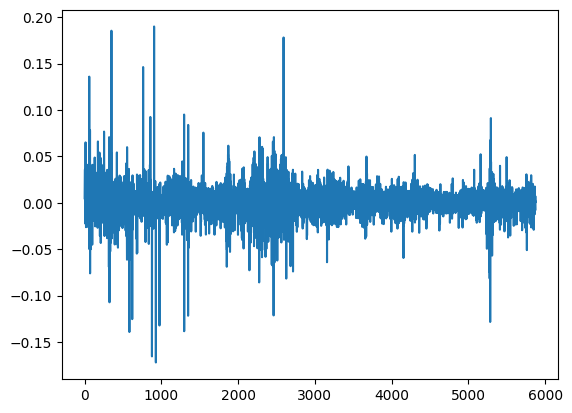

In [3]:
plt.plot(df)

In [4]:
date=0
year = date + np.arange(len(df))*1

In [5]:
def error(old_data, new_data):
    error=0
  
    for i in range(2,len(new_data)-2):
        error=max(error,abs(old_data[i]-new_data[i])*100/old_data[i])
    return error


In [35]:

def getBestWaveLet(thresh,type):
    best_wavelet=[]
    min_error=1e9
    refined_data=None
    for wav in pywt.wavelist(kind='discrete'):
        coeff=pywt.wavedec(df,wav,'symmetric')
        for i in range(0,len(coeff)):
            coeff[i]=pywt.threshold(coeff[i],thresh,type)
        new_data=pywt.waverec(coeff,wav)
    
        if(error(df,new_data)<min_error):
            best_wavelet.append(wav)
            refined_data=new_data

            
        min_error=min(error(df,new_data),min_error)
    plt.plot(refined_data)
    plt.title(best_wavelet[-1])
    plt.show()
    print("Best wavelet for threshold",thresh,"is",best_wavelet[-1],"with max percentage error of", min_error)



   


/tmp/ipykernel_100935/3533128901.py:5: RuntimeWarning: invalid value encountered in scalar divide
  error=max(error,abs(old_data[i]-new_data[i])*100/old_data[i])
/tmp/ipykernel_100935/3533128901.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  error=max(error,abs(old_data[i]-new_data[i])*100/old_data[i])


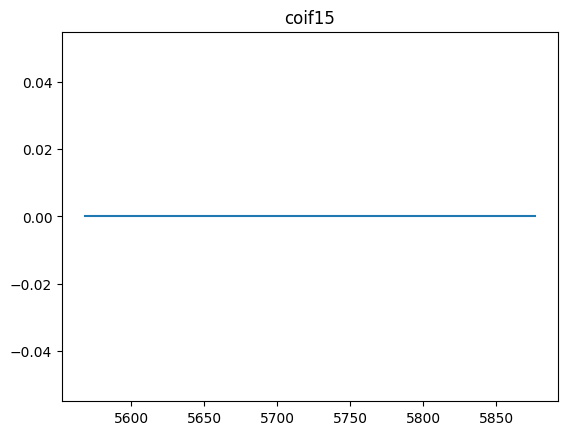

Best wavelet for threshold 0.2 is coif15 with max percentage error of 100.0


In [36]:
getBestWaveLet(0.2,'hard')

In [37]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

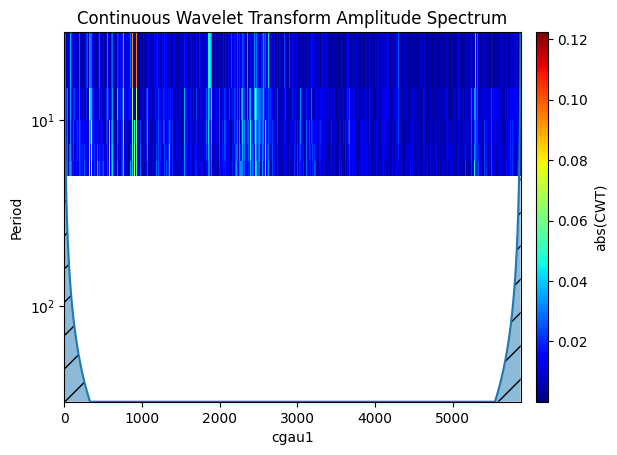

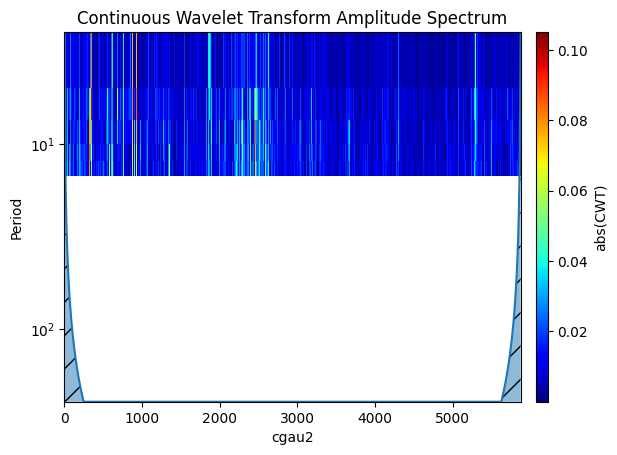

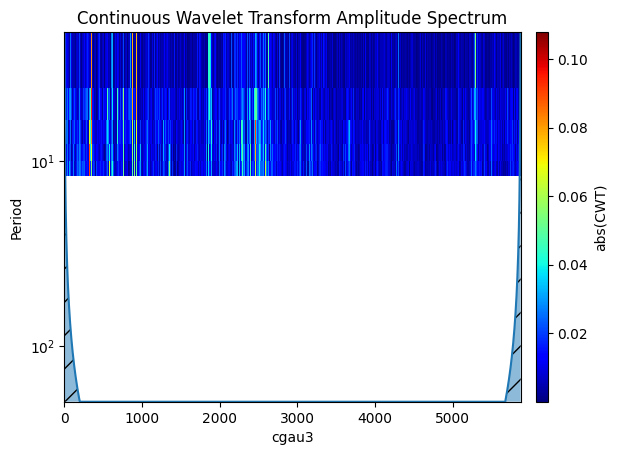

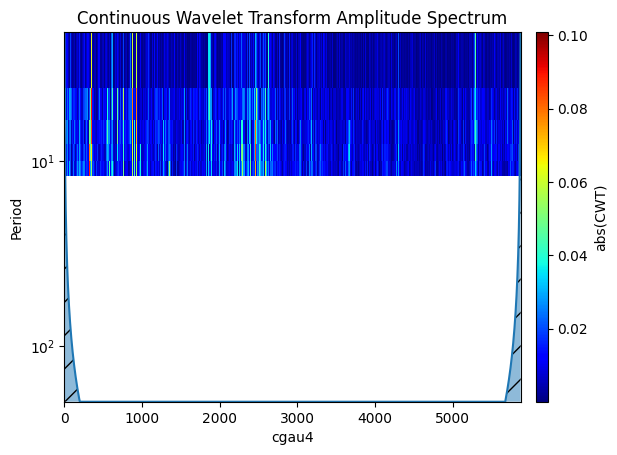

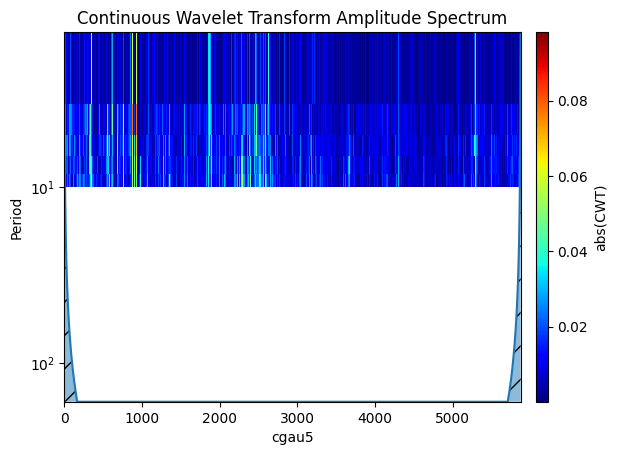

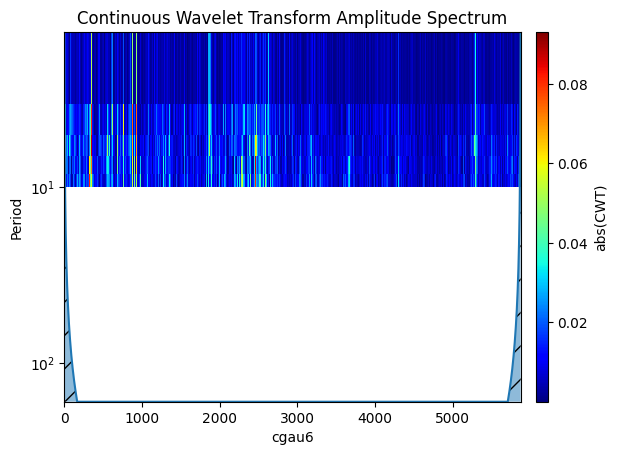

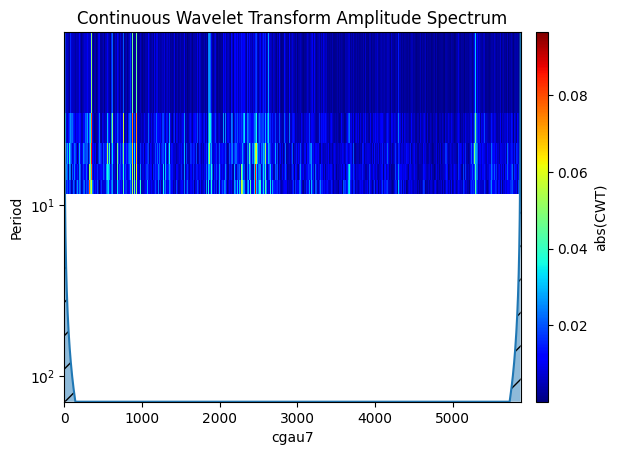

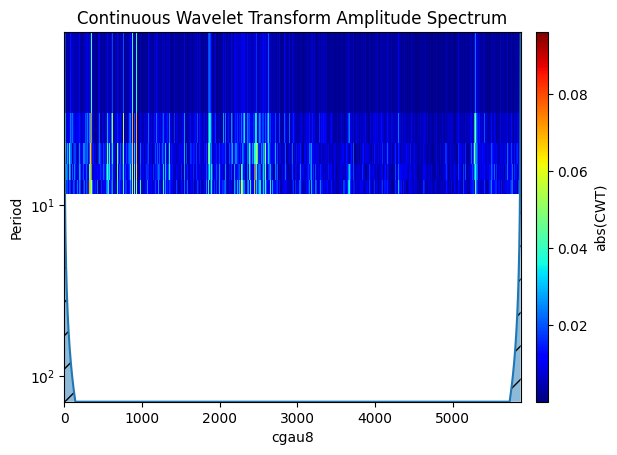

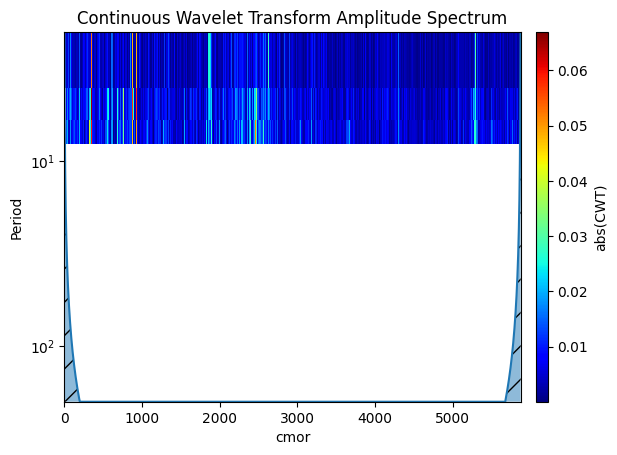

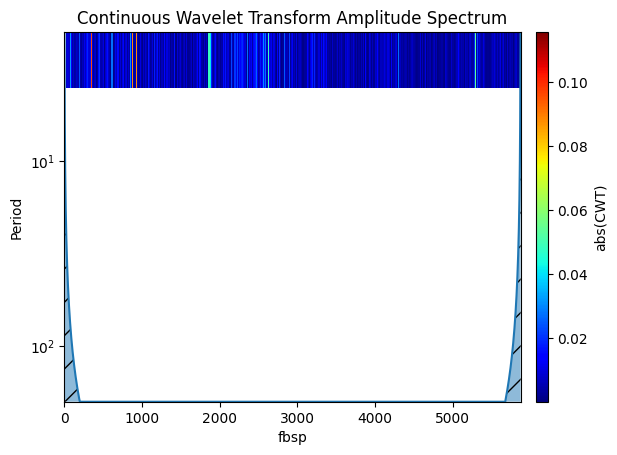

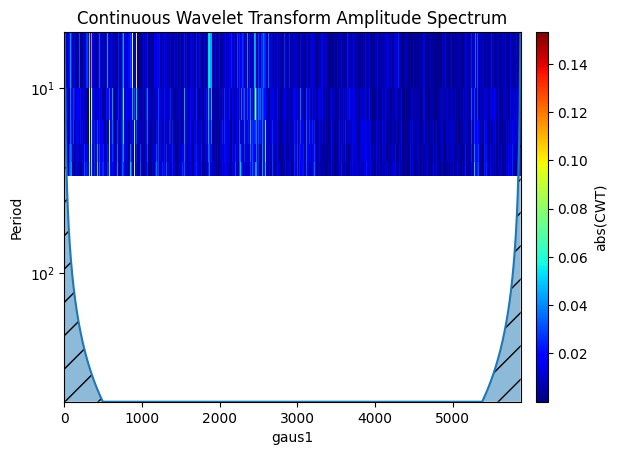

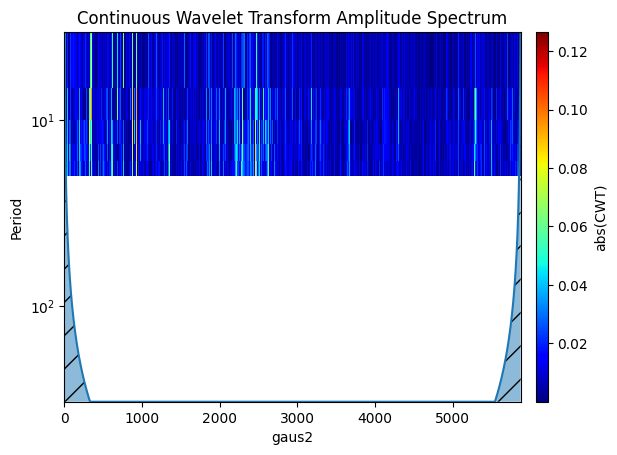

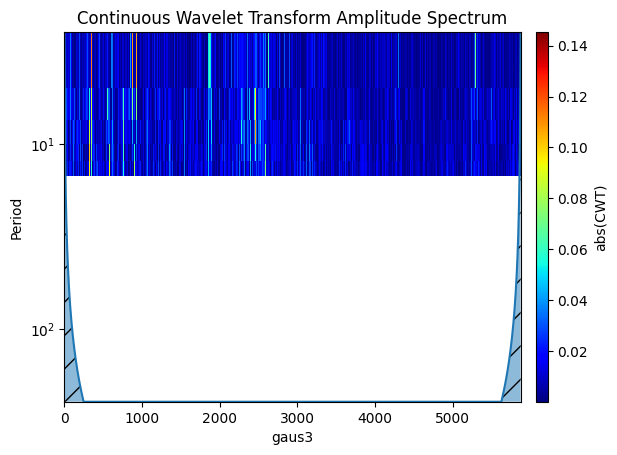

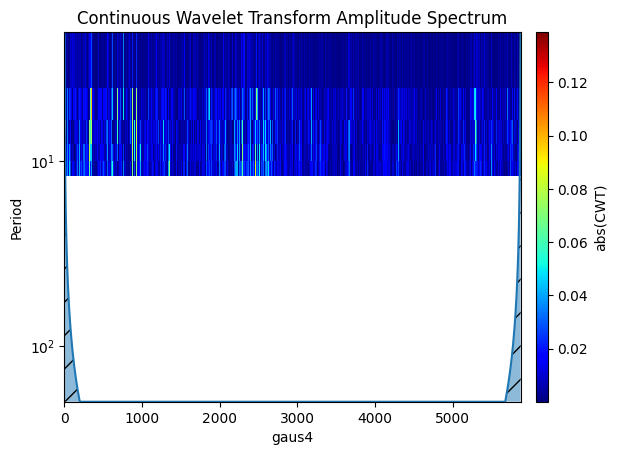

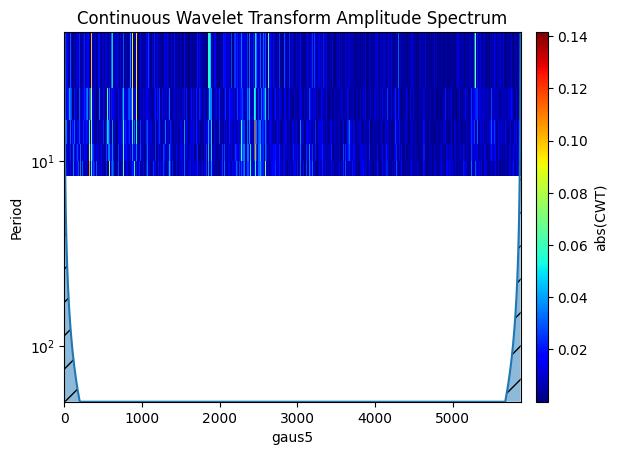

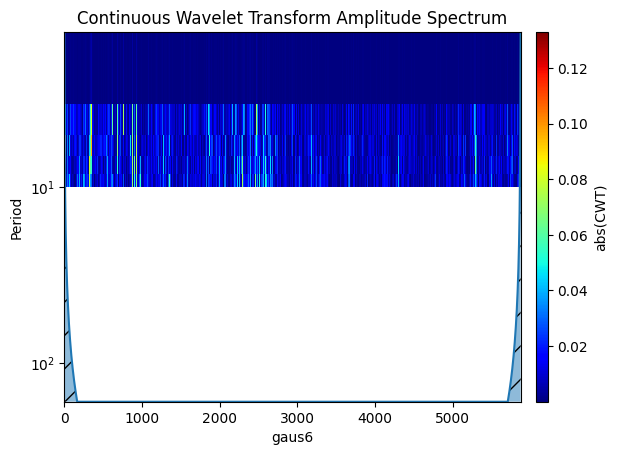

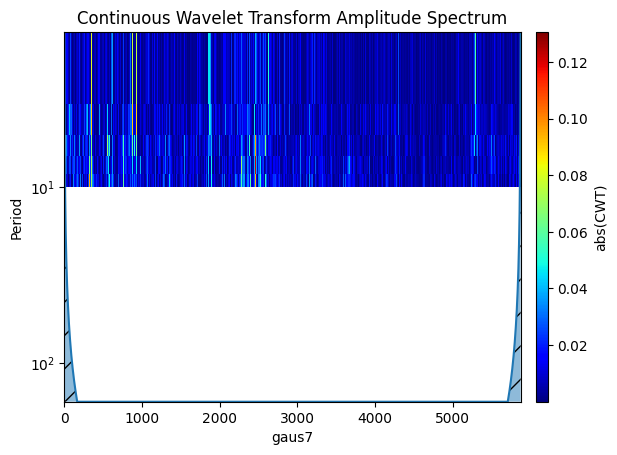

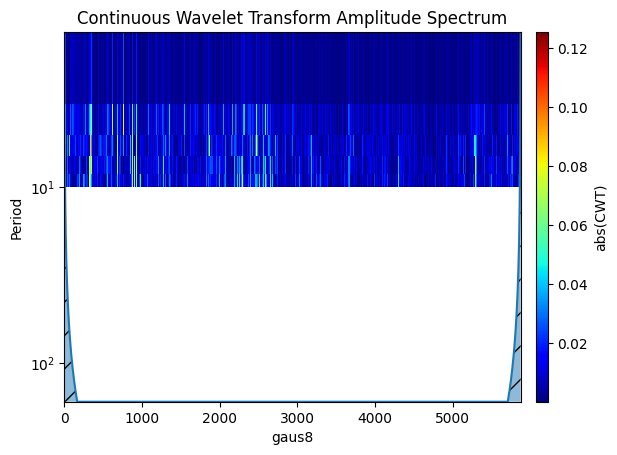

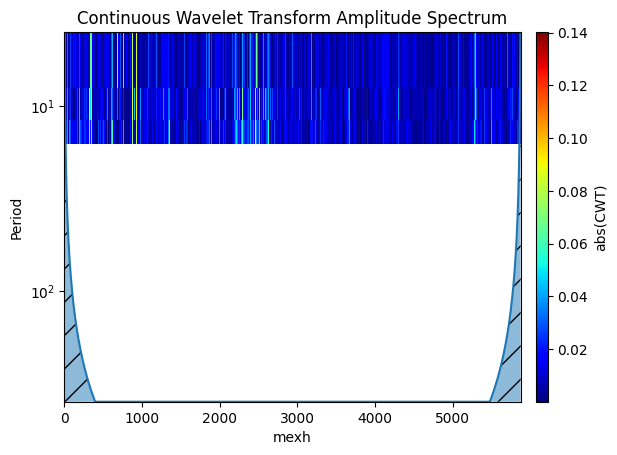

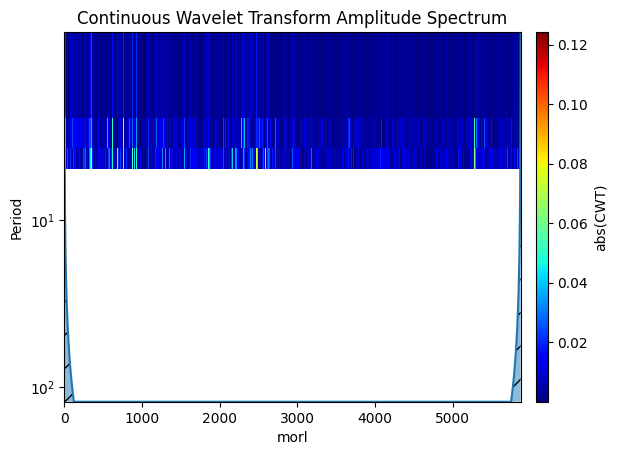

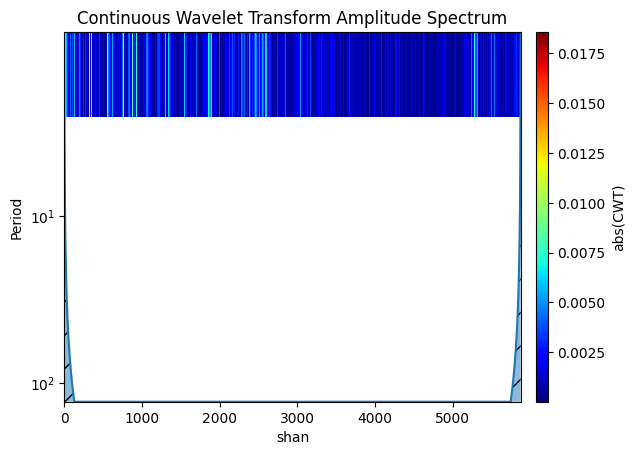

In [43]:
import time
for wave in pywt.wavelist(kind='continuous'):
    scg.cws(year,df,wavelet=wave,xlabel=wave,yscale='symlog')
    